In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
with MPRester("kMkuaNd0F7org0EE2QryQaonTKfVvGw4") as m:
    structure = m.get_structure_by_material_id("mp-10226")
struct = SpacegroupAnalyzer(structure)
struct_con = struct.get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Graphe de l'intensité de la diffraction en fonction de l'angle

AttributeError: 'Axes' object has no attribute 'show'

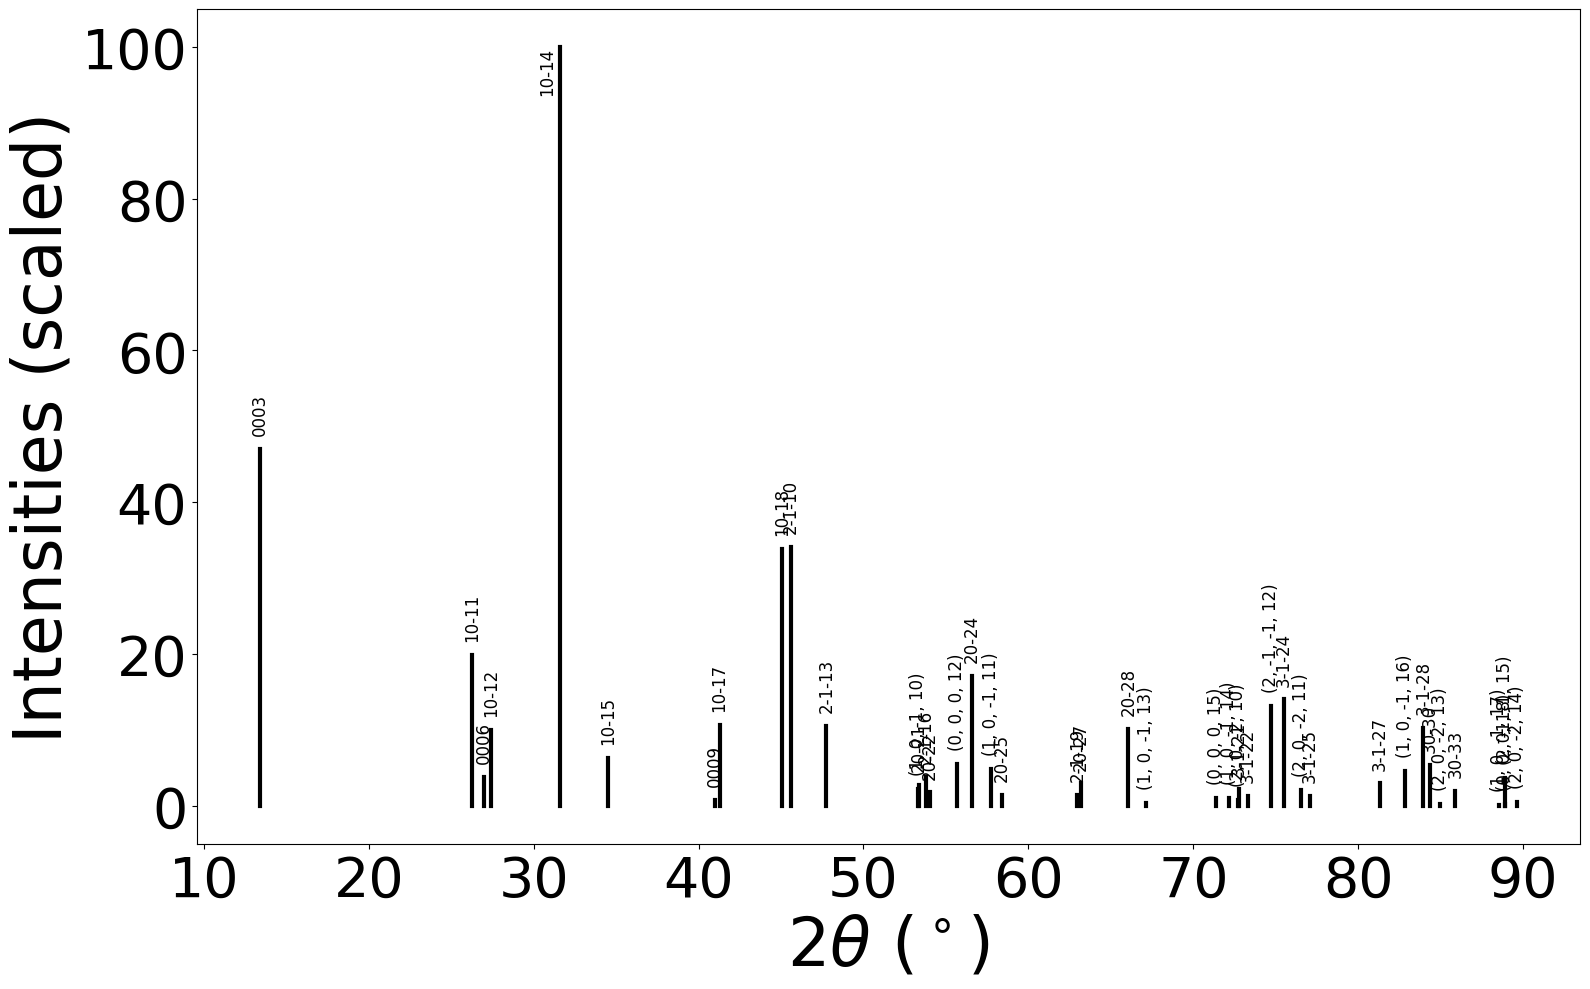

In [3]:
xrd_calculator = XRDCalculator(wavelength='CuKa1', symprec=0, debye_waller_factors=None) 
ploting = xrd_calculator.get_plot(struct_con, two_theta_range=(0, 90), annotate_peaks='compact', ax=None, with_labels=True, fontsize=12)
ploting.show()

3 premiers pics

In [4]:
xrd_pattern = xrd_calculator.get_pattern(struct_con, scaled=True, two_theta_range=(0, 90))
scale = (xrd_pattern.x)[0:3] #angle
intensity = (xrd_pattern.intensity)[0:3] #intensité
hkls = xrd_pattern.hkls[0:3] #plan hkl

for i in range(len(scale)): #print des résultats
    print("Le pic de diffraction "+str(i + 1))
    print("angle 2\u03B8 = "+str(scale[i])+"°\n")
    print("intensité = "+str(intensity[i])+" sur une échelle de 100\n")
    print("un plan (hkl) = "+str(hkls[i][0].get("hkl"))+" de multiplicité "+str(hkls[i][0].get("multiplicity"))+"\n")
    print("\n")

Le pic de diffraction 1
angle 2θ = 13.40267128095945°

intensité = 47.068129502100106 sur une échelle de 100

un plan (hkl) = (0, 0, 0, 3) de multiplicité 2



Le pic de diffraction 2
angle 2θ = 26.251160288507453°

intensité = 19.827936157666965 sur une échelle de 100

un plan (hkl) = (1, 0, -1, 1) de multiplicité 12



Le pic de diffraction 3
angle 2θ = 26.99321373242863°

intensité = 3.7578935557941326 sur une échelle de 100

un plan (hkl) = (0, 0, 0, 6) de multiplicité 2



